In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [236]:
df = pd.read_csv('lending_csv_v3.csv')

/Users/sanjeev/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (49,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [237]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1604328,70811807,NaN,12800.0,12800.0,12800.0,60 months,21.18,347.59,E,E3,HR Generalis,10+ years,MORTGAGE,61000.0,Verified,Feb-2016,Charged Off,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,27.15,1.0,Oct-2004,665.0,669.0,0.0,5.0,NaN,12.0,0.0,23676.0,81.1,41.0,f,0.0,0.0,4696.20,4696.20,763.00,1307.48,0.0,2625.72,472.6296,Aug-2016,347.59,NaN,Dec-2016,544.0,540.0,0.0,47.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,298836.0,0.0,3.0,2.0,9.0,8.0,28171.0,88.0,1.0,3.0,870.0,85.0,29200.0,1.0,5.0,2.0,12.0,24903.0,611.0,70.9,0.0,0.0,121.0,130.0,11.0,8.0,6.0,11.0,44.0,11.0,5.0,3.0,2.0,5.0,2.0,12.0,18.0,6.0,17.0,5.0,12.0,0.0,0.0,0.0,3.0,82.9,50.0,0.0,0.0,337444.0,51847.0,2100.0,31884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,241274,982256,NaN,2000.0,2000.0,2000.0,36 months,12.69,67.09,B,B5,Kmart,10+ years,MORTGAGE,52645.0,Not Verified,Oct-2011,Charged Off,n,Borrower added on 10/07/11 > misc. expenses ...,other,personnal,606xx,IL,12.47,0.0,Apr-2001,670.0,674.0,0.0,50.0,NaN,5.0,0.0,5910.0,46.9,18.0,f,0.0,0.0,822.35,822.35,529.19,203.63,0.0,89.53,0.8000,Sep-2012,67.09,NaN,Oct-2016,659.0,655.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,N

In [238]:
df.shape

(300000, 151)

<AxesSubplot:>

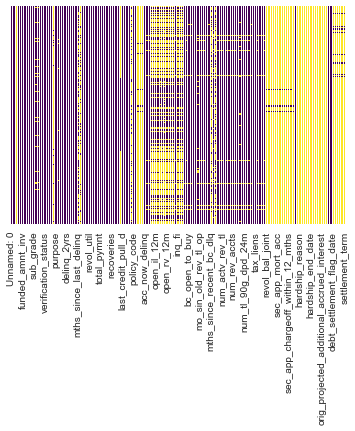

In [239]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [241]:
df.isnull().sum()

Unnamed: 0                                         0
id                                                 0
member_id                                     300000
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19664
emp_length                                     18079
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                    

### Removing null column

In [244]:
removed_columns = ['settlement_term', 'settlement_percentage', 'settlement_amount', 'settlement_date', 'settlement_status',
                   'debt_settlement_flag_date', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'orig_projected_additional_accrued_interest',
                   'hardship_loan_status', 'hardship_dpd', 'hardship_length','revol_bal_joint', 'payment_plan_start_date', 'hardship_end_date', 'hardship_start_date',
                   'hardship_amount', 'deferral_term', 'hardship_status', 'hardship_reason', 'hardship_type', 'sec_app_mths_since_last_major_derog', 
                   'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util',
                   'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low',
                   'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc', 'member_id', 'id', 'Unnamed: 0', 'mths_since_recent_bc_dlq',
                   'mths_since_last_major_derog', 'mths_since_last_record'
                  ]

In [245]:
df.drop(removed_columns, axis=1, inplace=True)

<AxesSubplot:>

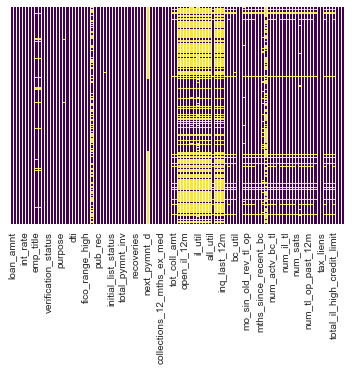

In [246]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [247]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,12800.0,12800.0,12800.0,60 months,21.18,347.59,E,E3,HR Generalis,10+ years,MORTGAGE,61000.0,Verified,Feb-2016,Charged Off,n,debt_consolidation,Debt consolidation,235xx,VA,27.15,1.0,Oct-2004,665.0,669.0,0.0,5.0,12.0,0.0,23676.0,81.1,41.0,f,0.0,0.0,4696.20,4696.20,763.00,1307.48,0.0,2625.72,472.6296,Aug-2016,347.59,NaN,Dec-2016,544.0,540.0,0.0,1.0,Individual,0.0,0.0,298836.0,0.0,3.0,2.0,9.0,8.0,28171.0,88.0,1.0,3.0,870.0,85.0,29200.0,1.0,5.0,2.0,12.0,24903.0,611.0,70.9,0.0,0.0,121.0,130.0,11.0,8.0,6.0,11.0,11.0,5.0,3.0,2.0,5.0,2.0,12.0,18.0,6.0,17.0,5.0,12.0,0.0,0.0,0.0,3.0,82.9,50.0,0.0,0.0,337444.0,51847.0,2100.0,31884.0,N,Cash,N
1,2000.0,2000.0,2000.0,36 months,12.69,67.09,B,B5,Kmart,10+ years,MORTGAGE,52645.0,Not Verified,Oct-2011,Charged Off,n,other,personnal,606xx,IL,12.47,0.0,Apr-2001,670.0,674.0,0.0,50.0,5.0,0.0,5910.0,46.9,18.0,f,0.0,0.0,822.35,822.35,529.19,203.63,0.0,89.53,0.8000,Sep-2012,67.09,NaN,Oct-2016,659.0,655.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N
2,29075.0,29075.0,29075.0,36 months,27.34,1192.31,F,F5,Professor,4 years,MORTGAGE,120000.0,Source Verified,May-2016,Charged Off,n,home_improvement,Home improvement,441xx,OH,10.40,0.0,Dec-2001,670.0,674.0,2.0,30.0,12.0,0.0,5648.0,60.1,20.0,f,0.0,0.0,3532.77,3532.77,1626.15,1906.62,0.0,0.00,0.0000,Aug-2016,1192.31,NaN,Dec-2017,594.0,590.0,1.0,1.0,Individual,0.0,194.0,141941.0,1.0,1.0,1.0,2.0,9.0,43247.0,NaN,3.0,3.0,4849.0,60.0,9400.0,10.0,0.0,7.0,6.0,12904.0,980.0,84.4,0.0,0.0,75.0,172.0,4.0,4.0,4.0,4.0,0.0,NaN,2.0,2.0,4.0,2.0,3.0,3.0,9.0,12.0,4.0,12.0,0.0,0.0,0.0,4.0,89.5,50.0,0.0,0.0,164709.0,48895.0,6300.0,55084.0,N,Cash,N
3,16000.0,16000.0,16000.0,36 months,8.39,504.27,A,A5,Trainng Specialist,10+ years,MORTGAGE,89000.0,Not Verified,Oct-2014,Charged Off,n,debt_consolidation,Debt consolidation,207xx,MD,18.85,0.0,Aug-1989,685.0,689.0,0.0,30.0,10.0,0.0,13662.0,88.7,19.0,f,0.0,0.0,15649.10,15649.10,11616.41,1991.12,0.0,2041.57,367.4826,Jan-2017,504.27,NaN,Dec-2017,559.0,555.0,0.0,1.0,Individual,0.0,0.0,32271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN,2.0,3586.0,660.0,93.2,0.0,0.0,146.0,302.0,5.0,5.0,0.0,55.0,NaN,30.0,0.0,3.0,6.0,3.0,4.0,6.0,8.0,13.0,6.0,10.0,0.0,0.0,0.0,1.0,89.5,66.7,0.0,0.0,54454.0,32271.0,9700.0,390

In [248]:
df.shape

(300000, 108)

In [249]:
df.isnull().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_title                          19664
emp_length                         18079
home_ownership                         0
annual_inc                             0
verification_status                    0
issue_d                                0
loan_status                            0
pymnt_plan                             0
purpose                                0
title                               4134
zip_code                               0
addr_state                             0
dti                                   52
delinq_2yrs                            0
earliest_cr_line                       0
fico_range_low                         0
fico_range_high 

### Removing columns which are having constant value throughout

In [1]:
df['pymnt_plan'].value_counts()

NameError: name 'df' is not defined

In [251]:
df['policy_code'].value_counts()

1.0    300000
Name: policy_code, dtype: int64

In [252]:
df['application_type'].value_counts()

Individual    295408
Joint App       4592
Name: application_type, dtype: int64

In [253]:
df['disbursement_method'].value_counts()

Cash         299308
DirectPay       692
Name: disbursement_method, dtype: int64

In [254]:
df['debt_settlement_flag'].value_counts()

N    292469
Y      7531
Name: debt_settlement_flag, dtype: int64

In [255]:
df['hardship_flag'].value_counts()

N    299999
Y         1
Name: hardship_flag, dtype: int64

In [193]:
removed_columns = ['pymnt_plan', 'policy_code', 'application_type', 'disbursement_method', 'debt_settlement_flag', 
                   'hardship_flag', 'zip_code']

In [194]:
df.drop(removed_columns, axis=1, inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [195]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,12800.0,12800.0,12800.0,60 months,21.18,347.59,E,E3,HR Generalis,10+ years,MORTGAGE,61000.0,Verified,Feb-2016,Charged Off,debt_consolidation,Debt consolidation,VA,27.15,1.0,Oct-2004,665.0,669.0,0.0,5.0,12.0,0.0,23676.0,81.1,41.0,f,0.0,0.0,4696.20,4696.20,763.00,1307.48,0.0,2625.72,472.6296,Aug-2016,347.59,NaN,Dec-2016,544.0,540.0,0.0,0.0,0.0,298836.0,0.0,3.0,2.0,9.0,8.0,28171.0,88.0,1.0,3.0,870.0,85.0,29200.0,1.0,5.0,2.0,12.0,24903.0,611.0,70.9,0.0,0.0,121.0,130.0,11.0,8.0,6.0,11.0,11.0,5.0,3.0,2.0,5.0,2.0,12.0,18.0,6.0,17.0,5.0,12.0,0.0,0.0,0.0,3.0,82.9,50.0,0.0,0.0,337444.0,51847.0,2100.0,31884.0
1,2000.0,2000.0,2000.0,36 months,12.69,67.09,B,B5,Kmart,10+ years,MORTGAGE,52645.0,Not Verified,Oct-2011,Charged Off,other,personnal,IL,12.47,0.0,Apr-2001,670.0,674.0,0.0,50.0,5.0,0.0,5910.0,46.9,18.0,f,0.0,0.0,822.35,822.35,529.19,203.63,0.0,89.53,0.8000,Sep-2012,67.09,NaN,Oct-2016,659.0,655.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,29075.0,29075.0,29075.0,36 months,27.34,1192.31,F,F5,Professor,4 years,MORTGAGE,120000.0,Source Verified,May-2016,Charged Off,home_improvement,Home improvement,OH,10.40,0.0,Dec-2001,670.0,674.0,2.0,30.0,12.0,0.0,5648.0,60.1,20.0,f,0.0,0.0,3532.77,3532.77,1626.15,1906.62,0.0,0.00,0.0000,Aug-2016,1192.31,NaN,Dec-2017,594.0,590.0,1.0,0.0,194.0,141941.0,1.0,1.0,1.0,2.0,9.0,43247.0,NaN,3.0,3.0,4849.0,60.0,9400.0,10.0,0.0,7.0,6.0,12904.0,980.0,84.4,0.0,0.0,75.0,172.0,4.0,4.0,4.0,4.0,0.0,NaN,2.0,2.0,4.0,2.0,3.0,3.0,9.0,12.0,4.0,12.0,0.0,0.0,0.0,4.0,89.5,50.0,0.0,0.0,164709.0,48895.0,6300.0,55084.0
3,16000.0,16000.0,16000.0,36 months,8.39,504.27,A,A5,Trainng Specialist,10+ years,MORTGAGE,89000.0,Not Verified,Oct-2014,Charged Off,debt_consolidation,Debt consolidation,MD,18.85,0.0,Aug-1989,685.0,689.0,0.0,30.0,10.0,0.0,13662.0,88.7,19.0,f,0.0,0.0,15649.10,15649.10,11616.41,1991.12,0.0,2041.57,367.4826,Jan-2017,504.27,NaN,Dec-2017,559.0,555.0,0.0,0.0,0.0,32271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN,2.0,3586.0,660.0,93.2,0.0,0.0,146.0,302.0,5.0,5.0,0.0,55.0,NaN,30.0,0.0,3.0,6.0,3.0,4.0,6.0,8.0,13.0,6.0,10.0,0.0,0.0,0.0,1.0,89.5,66.7,0.0,0.0,54454.0,32271.0,9700.0,39054.0
4,35000.0,35000.0,35000.0,36 months,18.49,1273.96,D,D2,"Stat medical x-ray tubes, inc.",10+ years,MORTGAGE,600000.0,Verified,Apr-2013,Charged Off,major_purchase,HeatPump,SC,11.76,3.0,Jun-1997,680.0,684.0,1.0,1.0,12.0,0

In [196]:
comparison_column = np.where(df["funded_amnt"] == df["funded_amnt_inv"], True, False)
unique, counts = np.unique(comparison_column, return_counts=True)
dict(zip(unique, counts))

{False: 26532, True: 273468}

In [197]:
df['verification_status'].value_counts()

Source Verified    114173
Verified            98053
Not Verified        87774
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

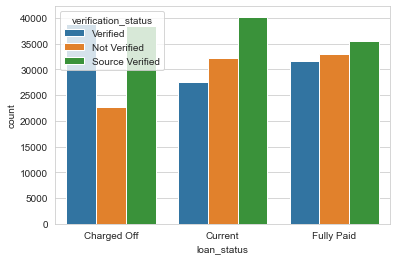

In [198]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status', hue='verification_status', data=df)

In [199]:
removed_column = ['funded_amnt', 'funded_amnt_inv', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med',
                 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'il_util', 'mths_since_recent_revol_delinq'
                 ]

In [200]:
df.drop(removed_column, axis=1, inplace=True)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [228]:
df.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      19664
emp_length                     18079
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
purpose                            0
title                           4134
addr_state                         0
dti                               52
delinq_2yrs                        0
earliest_cr_line                   0
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     0
mths_since_last_delinq        149774
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       166
t

In [202]:
df['pub_rec_bankruptcies'].value_counts()

0.0     262986
1.0      34568
2.0       1800
3.0        343
4.0         94
5.0         34
6.0         13
7.0          4
8.0          4
12.0         1
Name: pub_rec_bankruptcies, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

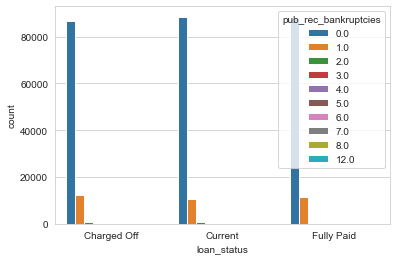

In [203]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status', hue='pub_rec_bankruptcies', data=df)

In [226]:
removed_column = ['open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m',
                  'open_rv_24m', 'max_bal_bc', 'all_util'
                  ]

<AxesSubplot:>

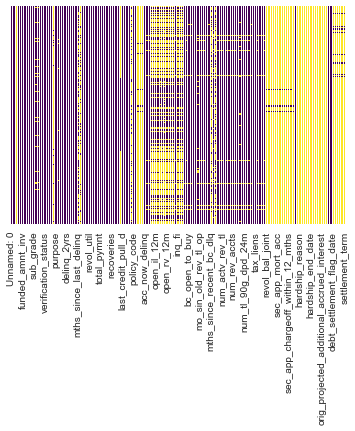

In [227]:
df.drop(removed_column, axis=1, inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [234]:
removed_column = ['inq_fi','total_cu_tl', 'inq_last_12m']
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [230]:
df.shape

(300000, 80)